In [5]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt #we only need plot
sb.set() # set the default Seaborn style for graphics

In [6]:
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

In [7]:
phishing_data = pd.read_csv("C:\\Users\\User\\Desktop\\DIP VSCode\\Phishing_Legitimate_full.csv")
phishing_data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


In [8]:
phishing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [9]:
phishing_data.isnull().any()

id                                    False
NumDots                               False
SubdomainLevel                        False
PathLevel                             False
UrlLength                             False
NumDash                               False
NumDashInHostname                     False
AtSymbol                              False
TildeSymbol                           False
NumUnderscore                         False
NumPercent                            False
NumQueryComponents                    False
NumAmpersand                          False
NumHash                               False
NumNumericChars                       False
NoHttps                               False
RandomString                          False
IpAddress                             False
DomainInSubdomains                    False
DomainInPaths                         False
HttpsInHostname                       False
HostnameLength                        False
PathLength                      

In [10]:
# not sure what this does
phishing_data.rename(columns={'CLASS_LABEL' : 'labels'}, inplace=True)

<Axes: xlabel='labels'>

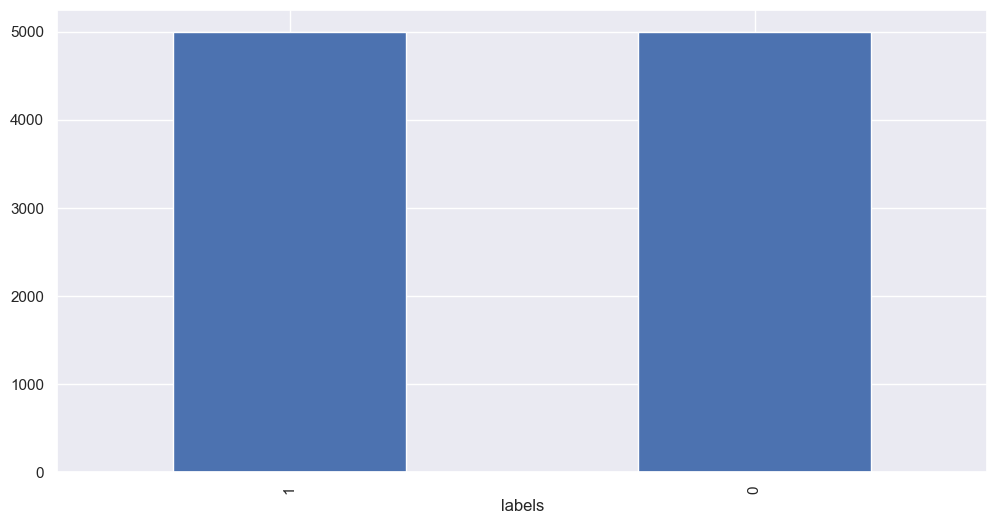

In [11]:
phishing_data['labels'].value_counts().plot(kind='bar')

In [12]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['labels']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sb.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

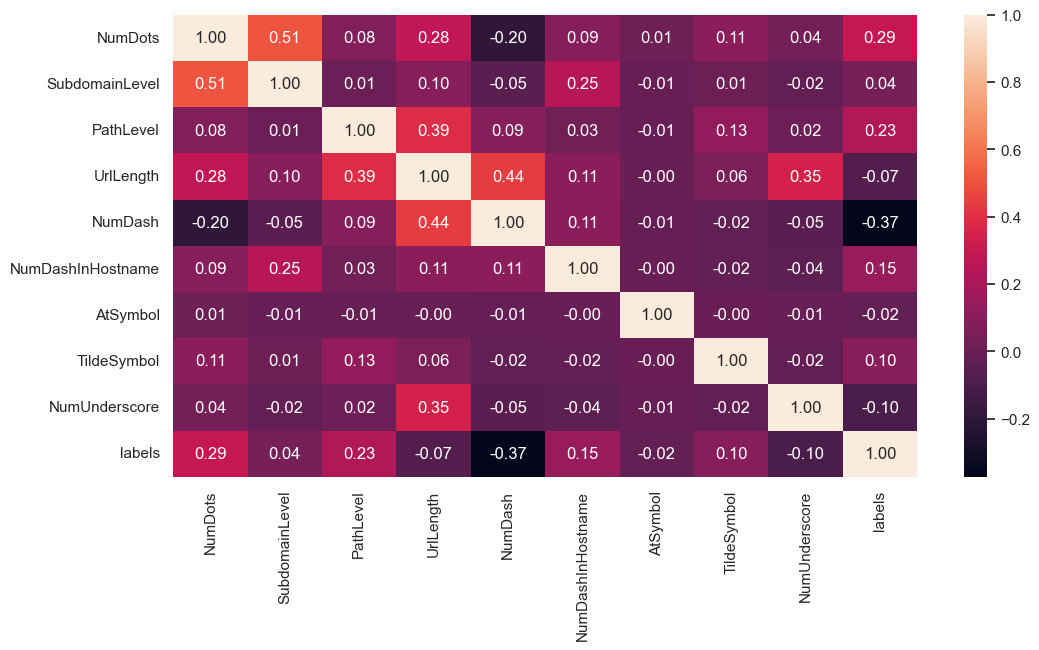

In [13]:
corr_heatmap(phishing_data, 0, 10)

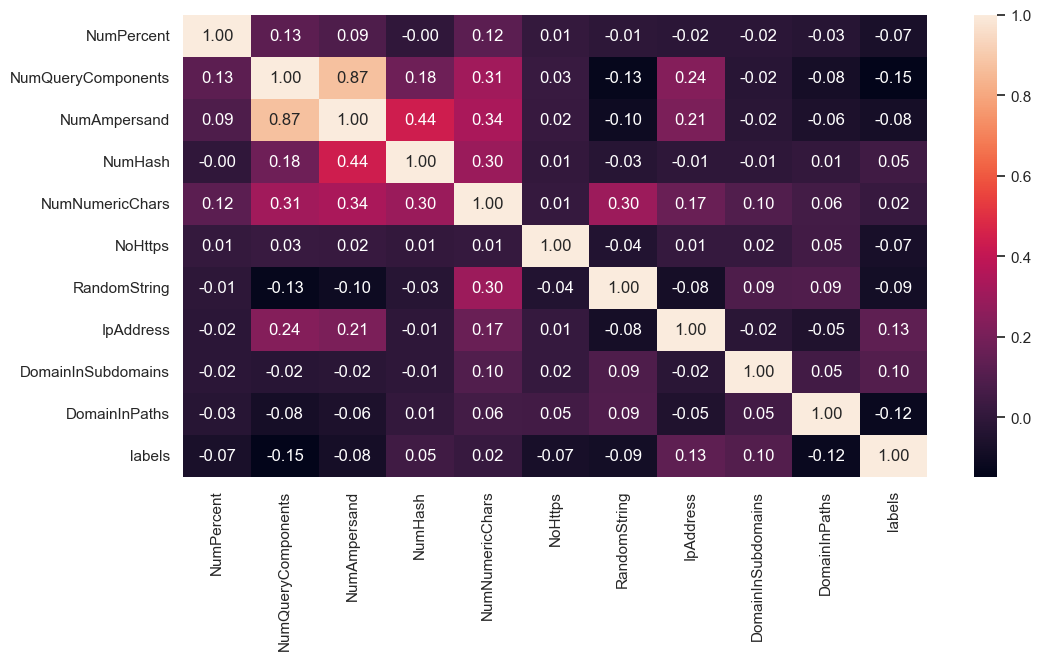

In [14]:
corr_heatmap(phishing_data,10,20)

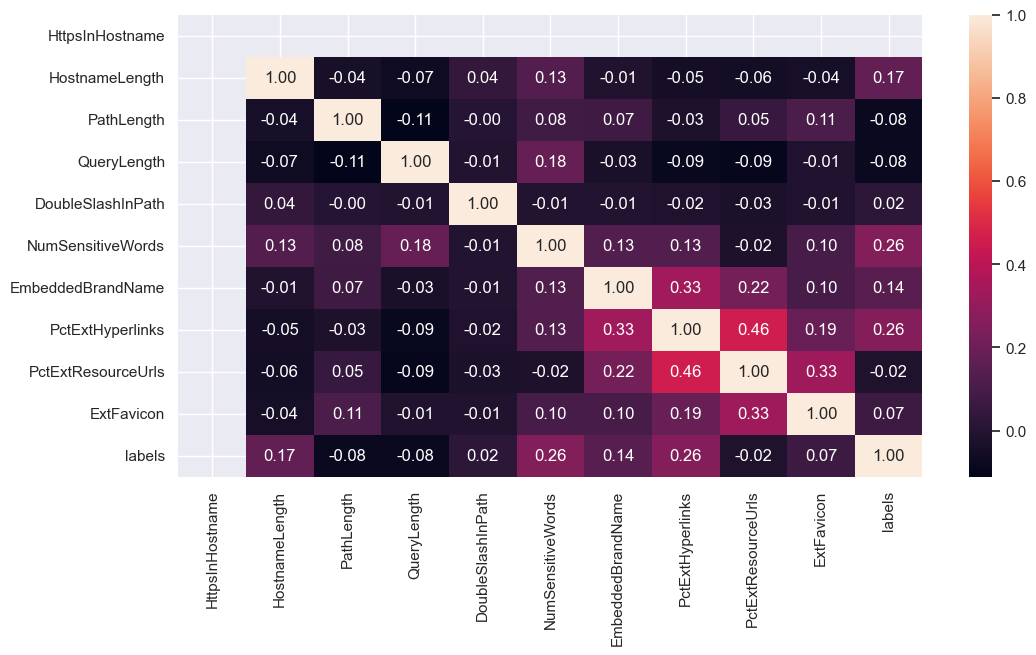

In [15]:
corr_heatmap(phishing_data,20,30)

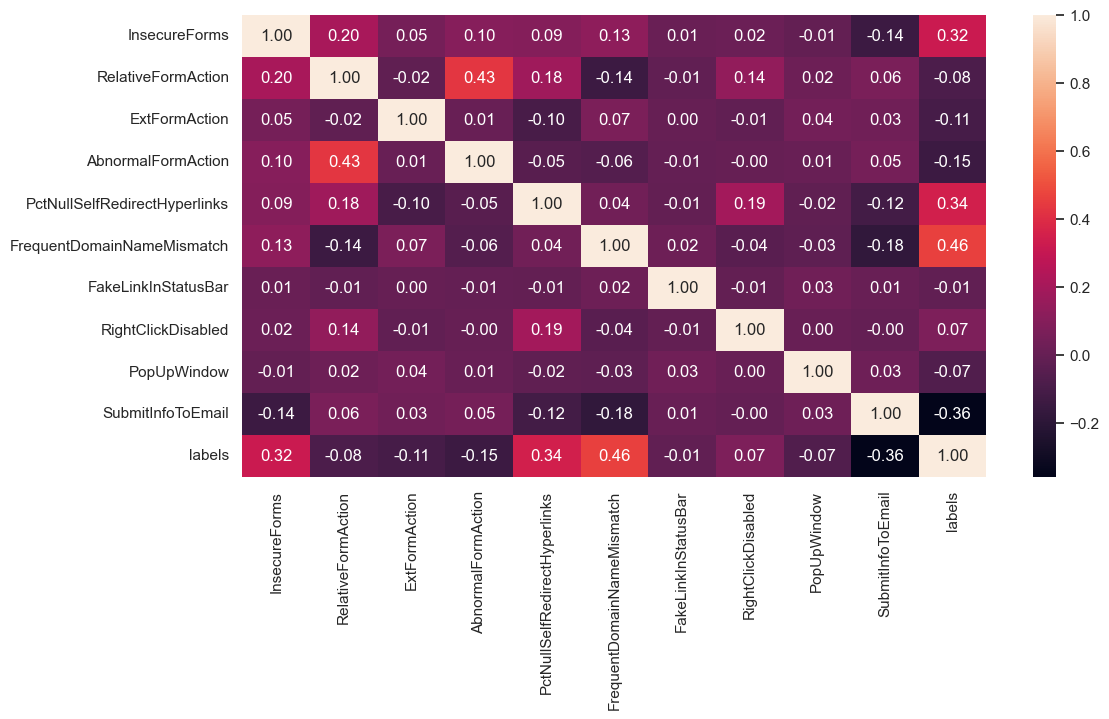

In [16]:
corr_heatmap(phishing_data,30,40)

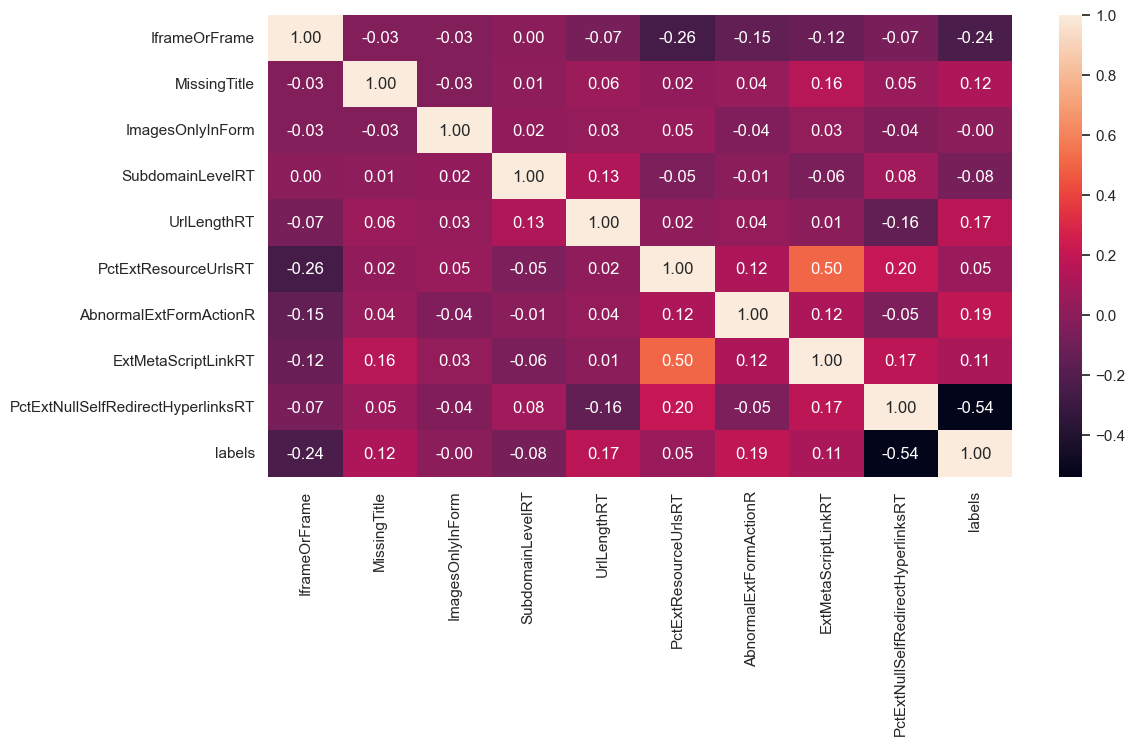

In [17]:
corr_heatmap(phishing_data,40,50)

In [18]:
from sklearn.feature_selection import mutual_info_classif

In [19]:
X = phishing_data.drop(['id', 'labels'], axis=1)
y = phishing_data['labels']

In [20]:
discrete_features = X.dtypes == int

In [21]:
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtHyperlinks                      0.466512
PctExtResourceUrls                    0.290344
PctNullSelfRedirectHyperlinks         0.238685
PctExtNullSelfRedirectHyperlinksRT    0.215556
FrequentDomainNameMismatch            0.129770
NumNumericChars                       0.125407
ExtMetaScriptLinkRT                   0.120256
NumDash                               0.115360
SubmitInfoToEmail                     0.073996
InsecureForms                         0.058649
NumDots                               0.057726
PathLength                            0.057711
QueryLength                           0.055397
PathLevel                             0.052417
UrlLength                             0.046494
NumSensitiveWords                     0.046261
NumQueryComponents                    0.030637
PctExtResourceUrlsRT                  0.027762
HostnameLength                        0.026086
NumAmpersand                          0.023183
IframeOrFrame                         0.020798
UrlLengthRT  

each time the code is run, the score changes but the order remains the same nonetheless

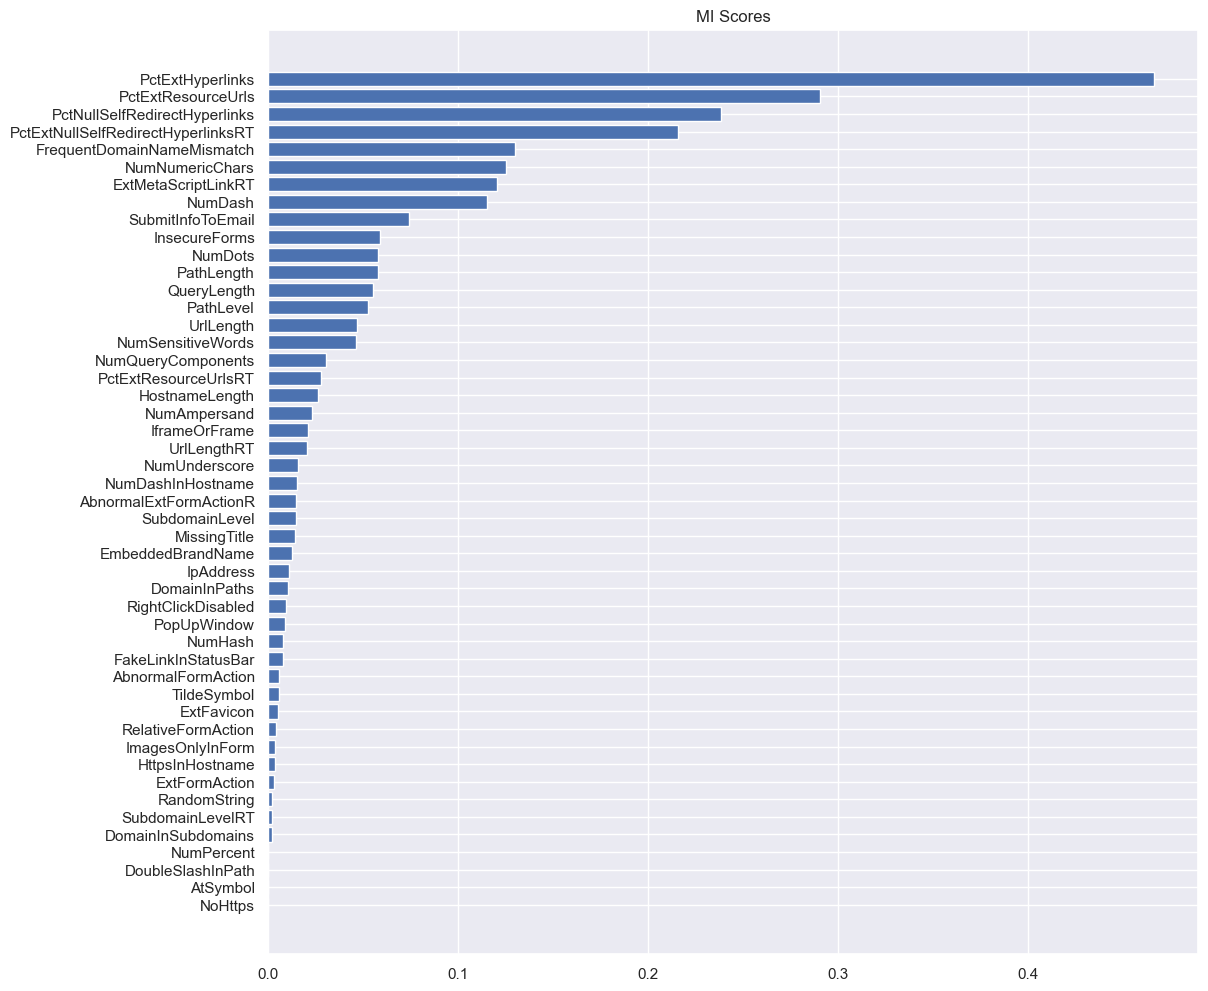

In [22]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
    
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as cuRfc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [24]:
def train_logs(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [25]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_logs(phishing_data, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Logistic Model with Top 20 features is precision : 0.918525703200776, recall : 0.9230019493177388, f1 score : 0.9207583859990277, accuracy : 0.9185
Performance for Logistic Model with Top 21 features is precision : 0.9317269076305221, recall : 0.9243027888446215, f1 score : 0.9279999999999999, accuracy : 0.928
Performance for Logistic Model with Top 22 features is precision : 0.9166666666666666, recall : 0.9250253292806484, f1 score : 0.9208270297528997, accuracy : 0.9215
Performance for Logistic Model with Top 23 features is precision : 0.9201970443349754, recall : 0.947261663286004, f1 score : 0.9335332333833083, accuracy : 0.9335
Performance for Logistic Model with Top 24 features is precision : 0.909952606635071, recall : 0.9421000981354269, f1 score : 0.9257473481195757, accuracy : 0.923
Performance for Logistic Model with Top 25 features is precision : 0.9236111111111112, recall : 0.9375629405840886, f1 score : 0.9305347326336832, accuracy : 0.9305
Performance for

In [27]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.918526,0.923002,0.920758,0.9185
1,21,0.931727,0.924303,0.928000,0.9280
2,22,0.916667,0.925025,0.920827,0.9215
3,23,0.920197,0.947262,0.933533,0.9335
4,24,0.909953,0.942100,0.925747,0.9230
5,25,0.923611,0.937563,0.930535,0.9305
6,26,0.921772,0.946757,0.934097,0.9310
7,27,0.931202,0.940313,0.935735,0.9340
8,28,0.912602,0.936392,0.924344,0.9265
9,29,0.923988,0.940704,0.932271,0.9320


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating 

<Axes: xlabel='num_of_features', ylabel='precision'>

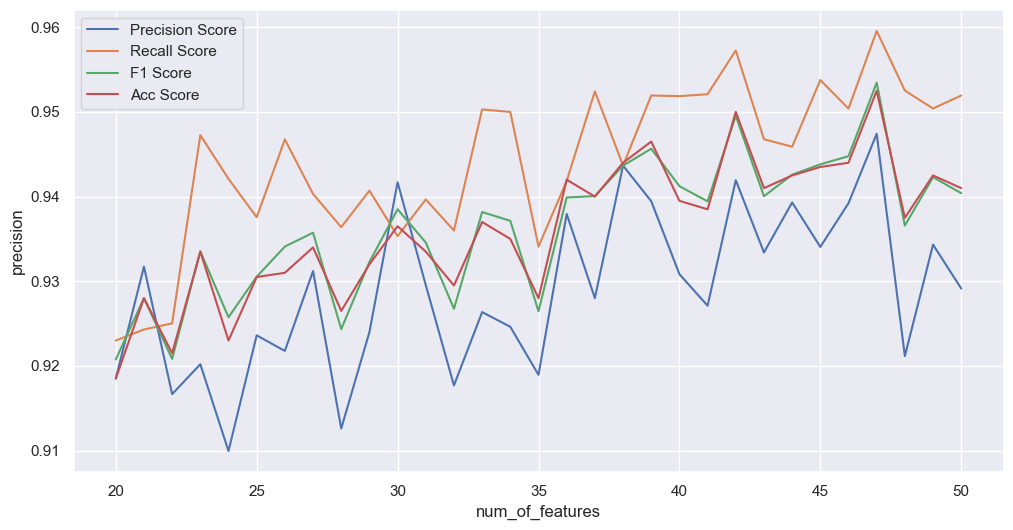

In [30]:
sb.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sb.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sb.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sb.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

cramers v

In [26]:
phishing_data_factors = list(phishing_data.columns)
phishing_data_factors = phishing_data_factors[1:]
print(phishing_data_factors)

['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname', 'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch', 'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT', 'labels']


trying something else

In [31]:
phishing_data.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [ ]:
temp_data = phishing_data.drop(['id', 'labels'], axis=1)
temp_data.columns

In [36]:
#familiarise with data
temp_data.shape

(10000, 48)

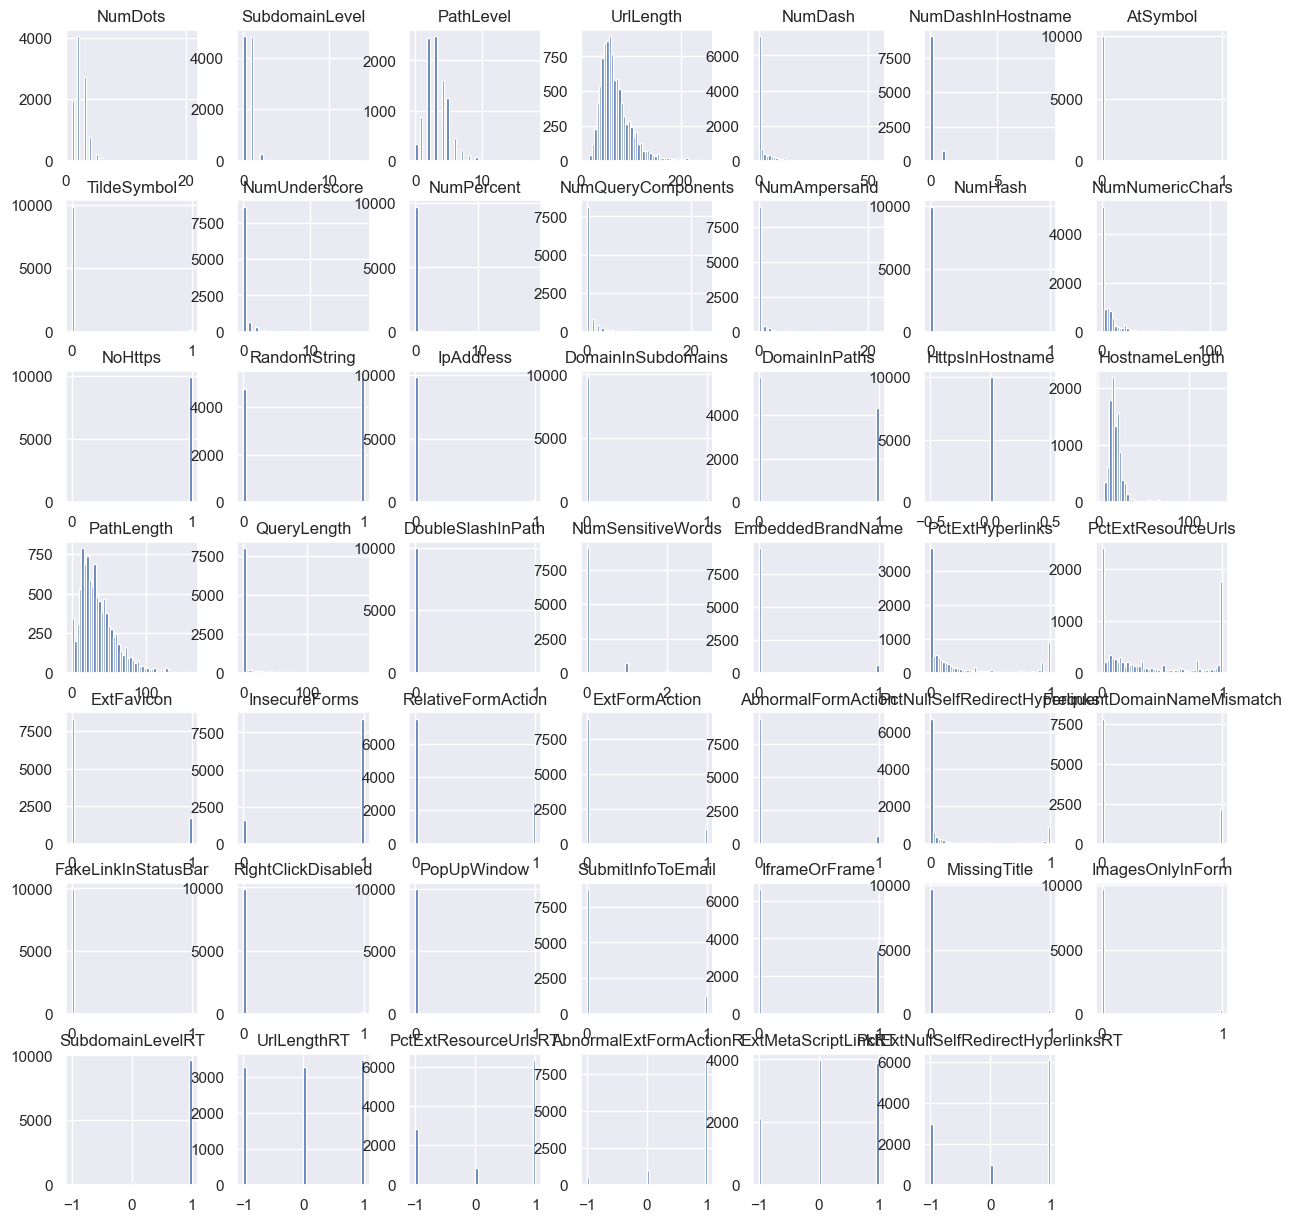

In [37]:
temp_data.hist(bins=50,figsize=(15,15))
plt.show()